In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import os
plt.style.use('ggplot')

In [126]:
df = pd.read_csv('C:/Users/User/Desktop/Intern_Data/Python/임원 데이터.csv', encoding = 'utf-8')

In [127]:
df

,Date,NHO-N
0,2010년_상,1.7
1,2010년_하,1.4
2,2011년_상,1.8
3,2011년_하,0.8
4,2012년_상,1.0
5,2012년_하,0.2
6,2013년_상,1.0
7,2013년_하,0.4
8,2014년_상,0.5
9,2014년_하,1.4


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    26 non-null     object 
 1   NHO-N   25 non-null     float64
dtypes: float64(1), object(1)
memory usage: 544.0+ bytes


In [129]:
df1 = df.fillna(df.mean()) #결측치 평균값으로 대체

In [130]:
df1

,Date,NHO-N
0,2010년_상,1.700
1,2010년_하,1.400
2,2011년_상,1.800
3,2011년_하,0.800
4,2012년_상,1.000
5,2012년_하,0.200
6,2013년_상,1.000
7,2013년_하,0.400
8,2014년_상,0.500
9,2014년_하,1.400


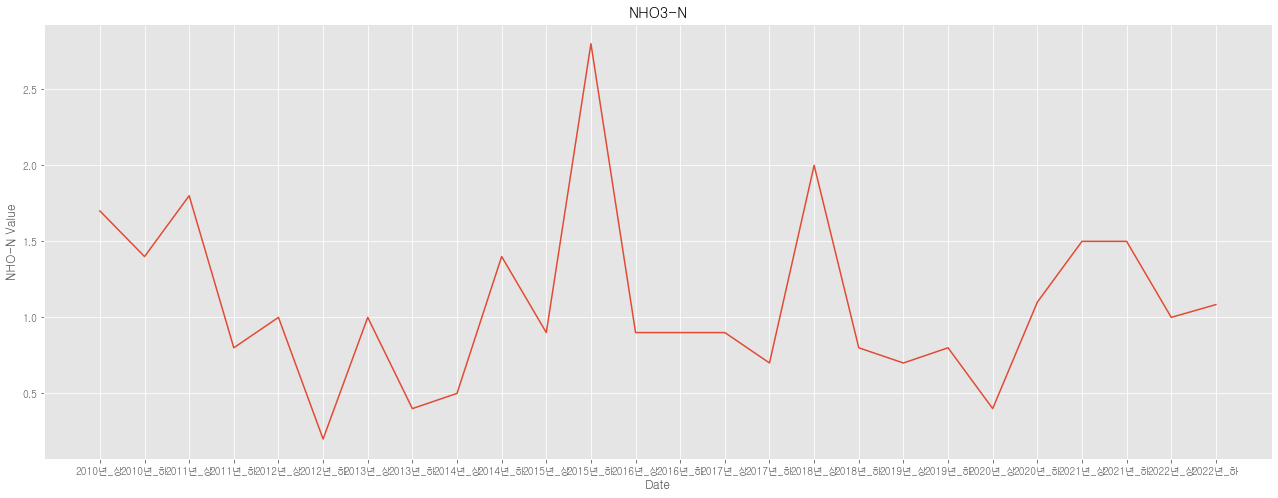

In [131]:
plt.figure(figsize=(22,8))
plt.plot(df1['Date'], df1['NHO-N'])
plt.title("NHO3-N")
plt.xlabel("Date")
plt.ylabel("NHO-N Value")
plt.show()

In [132]:
#TimeSeries 형태로 변경
timeSeries = df1.loc[:, ["Date", "NHO-N"]]
timeSeries.index = timeSeries.Date
ts = timeSeries.drop("Date",axis = 1)
ts

,NHO-N
Date,
2010년_상,1.700
2010년_하,1.400
2011년_상,1.800
2011년_하,0.800
2012년_상,1.000
2012년_하,0.200
2013년_상,1.000
2013년_하,0.400
2014년_상,0.500


In [133]:
train = ts.loc[:'2020년_하']
test = ts.loc['2021년_상':]

<Figure size 432x288 with 0 Axes>

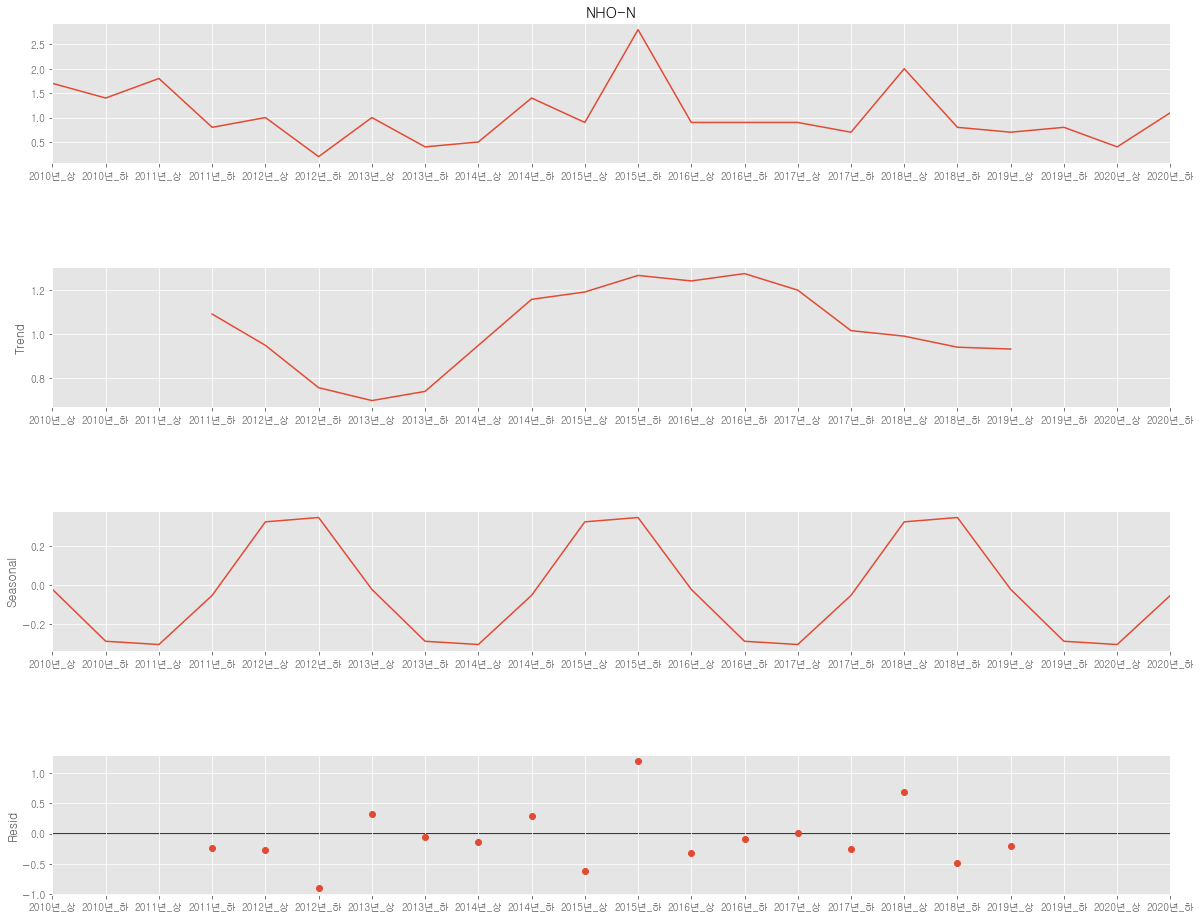

In [134]:
#시계열 분해법
from statsmodels.tsa.seasonal import seasonal_decompose
# 반기 주기라 period = 6으로 설정
result = seasonal_decompose(train['NHO-N'], model='additive', period= 6)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,15)

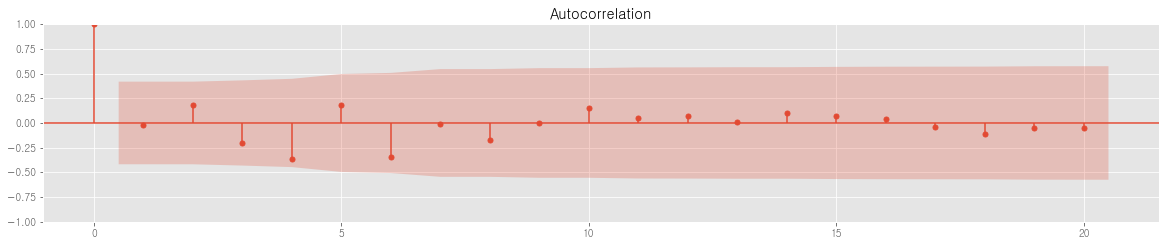

In [135]:
#ADF 그래프
import statsmodels.api as sm

fig = plt.figure(figsize = (20, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train, lags=20, ax=ax1)

In [136]:
#가설 검증
#H0: 정당성 만족 X , #H1 : 장당성 만족
from statsmodels.tsa.stattools import adfuller
result = adfuller(train)
print ('ADF Statistic : %f' % result[0])
print ('p-value: %f' % result[1])
print ('Critical Value: ')
for key, value in result[4]. items():
    print('\t%s : %.3f' % (key, value))

ADF Statistic : -1.881360
p-value: 0.340880
Critical Value: 
	1% : -4.138
	5% : -3.155
	10% : -2.714


In [137]:
# p-value 가 >0.05임으로 차분
train_diff = train - train.shift()
train_diff = train_diff.fillna(train_diff.mean())

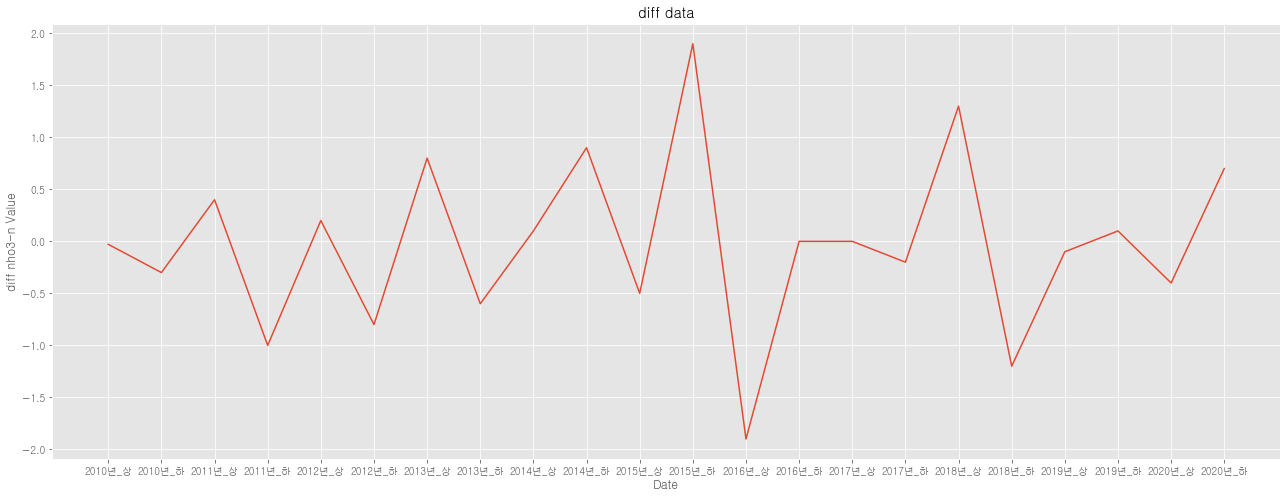

In [138]:
plt.figure(figsize=(22,8))
plt.plot(train_diff)
plt.title("diff data")
plt.xlabel("Date")
plt.ylabel("diff nho3-n Value")
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



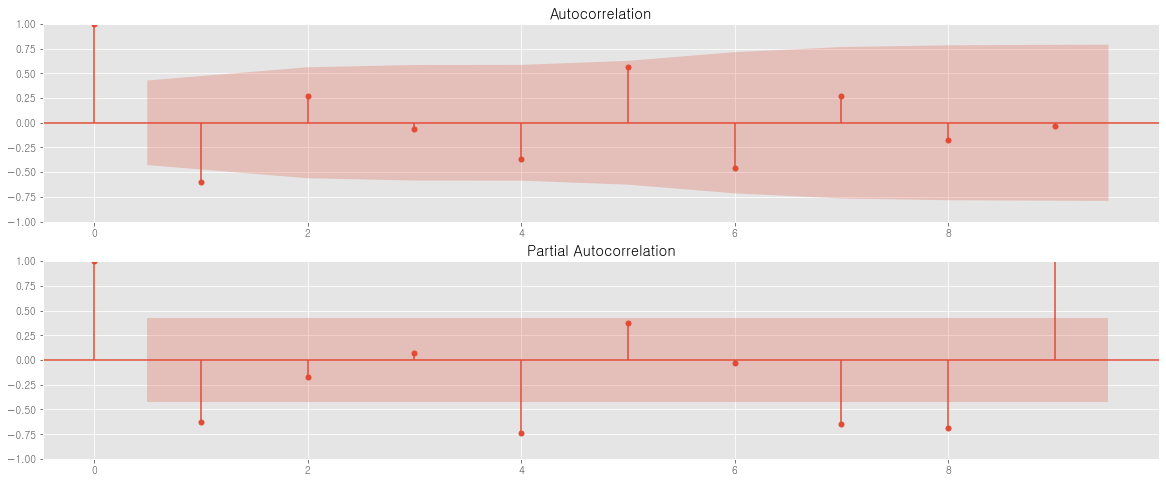

In [139]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_diff[1:], lags = 9, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_diff[1:], lags= 9 , ax=ax2)

In [140]:
result = adfuller(train_diff[1:])
print ('ADF Statistic : %f' % result[0])
print ('p-value: %f' % result[1])
print ('Critical Value: ')
for key, value in result[4]. items():
    print('\t%s : %.3f' % (key, value))

ADF Statistic : -4.071363
p-value: 0.001080
Critical Value: 
	1% : -3.889
	5% : -3.054
	10% : -2.667


In [165]:
from pmdarima.arima import auto_arima
model_arima = auto_arima(train,
                         trace=True, 
                         d = 1,
                         error_action='ignore', 
                         start_p=1,
                         start_q=1,
                         max_p=7,
                         max_q=7,
                         stepwise=False,
                         seasonal=True)
model_arima.fit(train)

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=56.589, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=49.138, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=50.693, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=49.512, Time=0.10 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=52.647, Time=0.02 sec
 ARIMA(3,

ARIMA(order=(4, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

In [166]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order= (4,1,0))
model_fit = model.fit()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



In [167]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  NHO-N   No. Observations:                   22
Model:                 ARIMA(4, 1, 0)   Log Likelihood                 -17.511
Date:                Wed, 28 Dec 2022   AIC                             45.022
Time:                        14:05:54   BIC                             50.244
Sample:                             0   HQIC                            46.155
                                 - 22                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6400      0.271     -2.357      0.018      -1.172      -0.108
ar.L2         -0.1589      0.328     -0.484      0.628      -0.802       0.485
ar.L3         -0.3313      0.426     -0.778      0.4

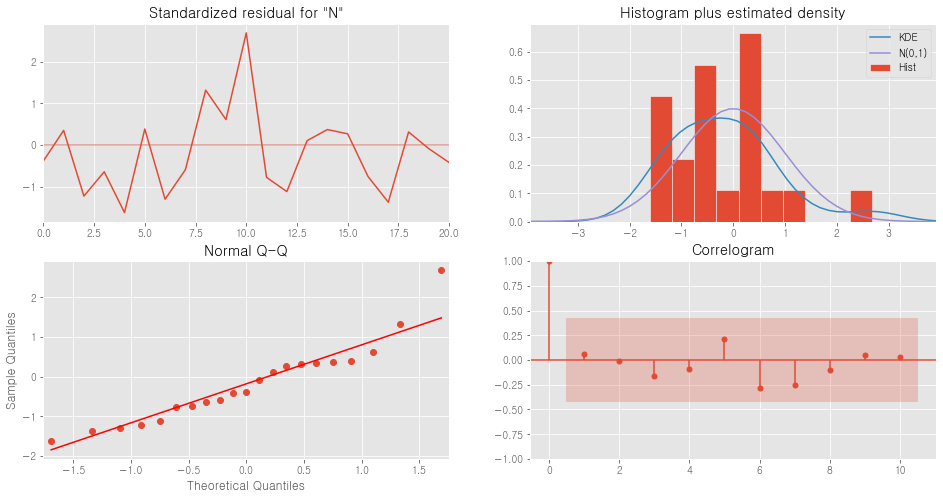

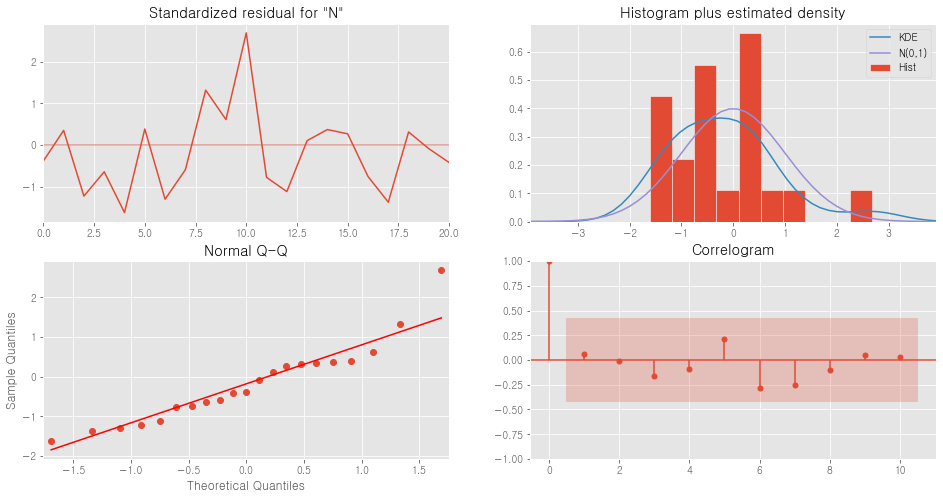

In [168]:
model_fit.plot_diagnostics(figsize=(16,8))

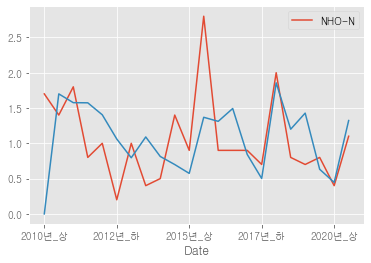

In [169]:
from statsmodels.graphics.tsaplots import plot_predict
fig, ax = plt.subplots()
ax = train.plot(ax=ax)
fig = model_fit.predict().plot(ax=ax)
plt.show()

In [170]:
fore = model_fit.forecast(4)
fore

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



22    0.736510
23    0.936361
24    0.850731
25    0.615427
Name: predicted_mean, dtype: float64

In [171]:
fredict = model_fit.predict()
fredict = fredict.to_frame()
fredict

,predicted_mean
Date,
2010년_상,0.000000
2010년_하,1.699999
2011년_상,1.575654
2011년_하,1.573491
2012년_상,1.403912
2012년_하,1.060669
2013년_상,0.795102
2013년_하,1.089933
2014년_상,0.813747


In [172]:
fr = pd.Series(fore, index = [22, 23, 24, 25])
fr = fr.to_frame()
fr_new = fr.rename(columns = {'predicted_mean' : 'predict'})
fr_new

,predict
22,0.736510
23,0.936361
24,0.850731
25,0.615427


In [173]:
#모델값과 예측값 조인
fredict_new = fredict.append(fr, ignore_index=True)
fredict_new = fredict_new.rename(columns = {'predicted_mean' : 'forecast'})
fredict_new

,forecast
0,0.000000
1,1.699999
2,1.575654
3,1.573491
4,1.403912
5,1.060669
6,0.795102
7,1.089933
8,0.813747
9,0.699167


<Figure size 2880x576 with 0 Axes>

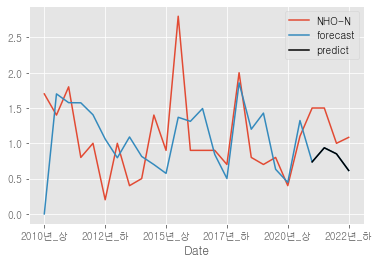

In [174]:
#시각화
plt.figure(figsize = (40,8))
fig, ax = plt.subplots()
ax = ts.plot(ax=ax)
fig1 = fredict_new.plot(ax=ax)
fig2 = fr_new.plot(color = 'black', ax=ax)
plt.legend()
plt.show()